In [12]:
import shap
from chessplainer.wrapper import EngineWrapper, ChessExplainer
import chess
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.style.use('default')

In [13]:
FIT_LIMIT_KWARGS = dict(time=5)
PREDICT_LIMIT_KWARGS = dict(time=0.1)

In [14]:
FEN = "7k/7p/8/8/3p4/2n5/6RK/7Q w - - 0 1"

White to move


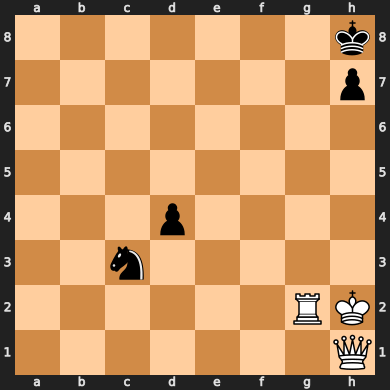

In [15]:
board = chess.Board(FEN)
print("White to move" if board.turn else "Black to move")
board

In [16]:
%%time
engine = EngineWrapper(
    path="stockfish",
    output_improvement_delta=False,
    wdl_model="lichess",
    fit_limit_kwargs=FIT_LIMIT_KWARGS,
    predict_limit_kwargs=PREDICT_LIMIT_KWARGS,
)
engine.fit([board])
chesshap = ChessExplainer(
    board,
    engine,
    explainer=shap.KernelExplainer,
)

print(chesshap.engine.base_score_)

chesshap.explain()

[[0.999 0.001]]


  0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 217 ms, sys: 23.2 ms, total: 240 ms
Wall time: 2.55 s


.values =
array([[[ 0.4787    , -0.4787    ],
        [ 0.25528333, -0.25528333],
        [-0.12996667,  0.12996667],
        [-0.0558    ,  0.0558    ],
        [-0.04921667,  0.04921667]]])

.base_values =
array([[0.5, 0.5]])

.data =
array([[1., 1., 1., 1., 1.]])

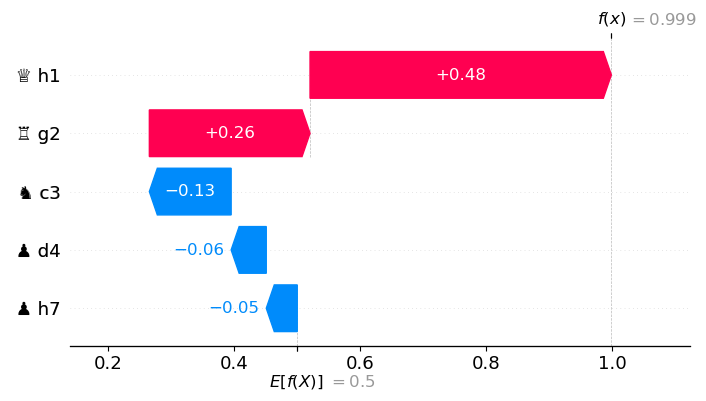

In [17]:
chesshap.explanation_.feature_names = chesshap.feature_names
shap.plots.waterfall(chesshap.explanation_[0, :, 0], max_display=10, show=False)
clean_labels = [label.get_text().replace('1 = ', '') for label in plt.gca().get_yticklabels()]
clean_labels = [label if "other" not in label else "other" for label in clean_labels]
fig = plt.gcf()
plt.gca().set_yticklabels(clean_labels)
plt.grid(False)
plt.show()


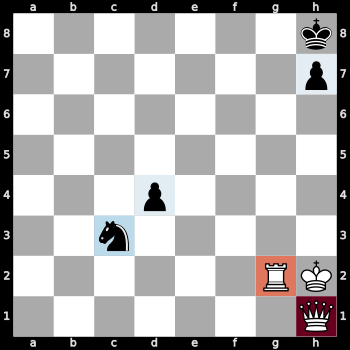

In [18]:
chesshap.to_svg(colors={
            "square light": "#ffffff",
            "square dark": "#aaaaaa",  # or use #cccccc for lighter gray
            "margin": "#000000",
            # "coord": "#000000",
        },
    index=0
)